## **Multiplicação de Matrizes:** Implementação _sequencial_, _Multithreading_ e _Multiprocessos_.

***

Este projeto visa observar as diferenças entre a implementação de algoritmos utilizando as abordagens sequencial, Multithreading e Multiprocessos, realizando testes de implementação e comparativos em termos de desempenho utilizando a linguagem **Python**, para a disciplina **Sistemas Operacionais** do curso de Bacharelado em Tecnologia da Informação, oferecido pela Universidade Federal do Rio Grande do Norte.

**Desenvolvido por:** José Manoel Freitas da Silva

***

### **1. Introdução**

A multiplicação de matrizes é uma das operações fundamentais da álgebra linear e desempenha um papel crucial em diversos campos da ciência da computação, engenharia e ciências exatas. Uma das principais vantagens da utilização dessa operação no desenvolvimento de software é a sua natureza altamente paralelizável, uma vez que multiplicação de matrizes é bastante suscetível à distribuição de tarefas, seja por meio de threads, em um ambiente multithread, ou por processos. Além disso, a multiplicação de matrizes pode ser escalada para grandes conjuntos de dados e dimensões, o que a torna relevante para problemas de alta complexidade encontrados em pesquisa científica e aplicações industriais.

Desse modo, nesse projeto iremos utilizar da independência de dados, que nos permite calcular cada elemento da matriz resultante de forma independente, para implementar algumas soluções paralelizadas e sequenciais como intuito de tecer uma análise de desempenho e otimização algorítmica, ressaltando a sua importância prática e sua capacidade de aproveitar os recursos computacionais disponíveis.

### **2. Considerações iniciais**

Neste projeto, devido à natureza analítica, empregaremos a linguagem de programação **Python**, combinada com o ambiente **Jupyter Notebook**, para examinar o comportamento de diferentes abordagens de implementação do mesmo algoritmo, visando a análise das vantagens e desvantagens de abordagens sequenciais e paralelas.

A seleção destas duas ferramentas se deve por oferecerem facilidade na produção de gráficos e relatórios quando utilizadas em conjunto com algumas bibliotecas como a _multiprocessing_, _threading_, _matplotlib_ e _numpy_, sendo esta última necessária para a criação de objetos e elementos essenciais para os testes e análises a serem conduzidos ao longo do projeto.

#### **2.1. A máquina utilizada**

Os testes e resultados obtidos nesse estudo foram realizados em um computador local, possuindo a seguintes configurações:

In [1]:
# Bibliotecas necessárias
import platform
import psutil
import cpuinfo

print("Sistema Operacional:", platform.system())
print("Python:", platform.python_version())
print(f"CPU: {cpuinfo.get_cpu_info()['brand_raw']} - {psutil.cpu_count(logical=True)} nucleos")
print(f"RAM Total: {psutil.virtual_memory().total} kB")

Sistema Operacional: Linux
Python: 3.11.5
CPU: Intel(R) Celeron(R) CPU  J1800  @ 2.41GHz - 2 nucleos
RAM Total: 8201646080 kB


### **3. Metodologia e recursos**

Para esse projeto será feito 3 implementações, sendo elas uma implementação **Sequencial**, uma implementação utilizando **Threads** e uma implementação utilizando **Processos**.

Cada uma das implementações receberá duas matrizes quadradas **M1** e **M2** de tamanho **L**x**C** variados, com valores do tipo inteiro randomizados por meio de um algorítimo auxiliar implementado em **Python**. Para as implementações em multiprocessamento será utilizado ainda uma segunda variável **P**, que determina parte das dimensões das submatrizes que serão processadas em cada thread ou processo criado, de modo a evitar problemas oriundos do excesso de processos abertos, frequentemente vistos em matrizes consideravelmente grandes. 

Para quantificar o desempenho de cada implementação será medido o tempo de execução em cada uma das metodologias, realizando a plotagem de gráficos de desempenho com o intuito de visualizar o tempo médio geral e o tempo médio em função de P.

Ao fim da execução será discutido alguns pontos, como os motivos dos resultados obtidos pelo experimento em relação ao tempo, qual o significado do resultado obtido em relação ao valor de P e as vantagens e desvantagens de cada metodologia.

#### **3.1. Multiplicação entre matrizes**

Uma matriz pode ser definida como uma estrutura matemática que organiza elementos em **linhas** e **colunas**, formando uma grade bidimensional. Nela cada elemento é identificado por sua posição única na matriz através do índice de linhas e colunas. Por exemplo, na matriz $A$, de dimensões 3x3, o elemento $A[i][j]$ é identificado pela linha $i$ e coluna $j$.

\begin{equation*}

A = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9

\end{bmatrix}

\end{equation*}

Assim, o elemento $A_{1,2}$ da matriz $A$ é igual a **2**.

Essa estrutura também está suscetível a algumas operações, como a multiplicação entre matrizes, que será utilizada como objeto de estudo.

A **multiplicação de matrizes** é uma operação que corresponde ao produto de duas matrizes $A$ e $B$, para produzir uma terceira matriz $C$. Para calcular o elemento $C_{i,j}$ da matriz resultante $C$, devemos multiplicar os elementos da linha $i$ da matriz $A$ pelos elementos da coluna $j$ da matriz $B$, somando os produtos. Matematicamente, isso pode ser expresso como:

\begin{equation*}
C_{i,j} = A_{i,1} \cdot B_{1,j} + A_{i,2} \cdot B_{2,j} + \ldots + A_{i,n} \cdot B_{n,j}
\end{equation*}

Esse processo é repetido para todos os elementos da matriz resultante $C$, resultando em uma nova matriz que é o produto das matrizes $A$ e $B$.

#### **3.2. Avaliação de desempenho**

Inicialmente, serão conduzidas uma série de operações utilizando a **implementação sequencial** em matrizes de dimensões crescentes, até que o tempo de execução alcance o limite de **10 minutos**. Esse teste preliminar estabelecerá um valor inicial de tempo de processamento com base no hardware utilizado, que servirá como ponto de referência para as próximas etapas.

A matriz obtida durante o teste anterior será então utilizada para implementar uma bateria de testes, empregando tanto **threads** quanto **multiprocessos**, a fim de calcular o **tempo médio** de execução da multiplicação de matrizes em relação a uma variável **P**. Inicialmente, **P** terá um valor elevado que será gradualmente reduzido ao longo de um número específico de execuções. O cálculo do tempo médio será realizado com base em 10 execuções para um mesmo valor de **P**, visando a minimização de possíveis interferências do sistema. A fórmula utilizada para calcular o tempo médio será:

\begin{equation*}
\text{tempo médio} = \frac{X_{1} + X_{2} + \ldots + X_{10}}{10}
\end{equation*}

#### **3.3. Importando recursos**

Para a implementação dos algoritmos a seguir utilizaremos as seguintes bibliotecas:

* **numpy:** Biblioteca em Python que fornece suporte para arrays multidimensionais e funções matemáticas de alto desempenho para manipulação de dados numéricos;

* **numba:** Biblioteca em Python que oferece uma forma de acelerar código Python usando compilação just-in-time (JIT);

* **multiprocessing:** Biblioteca em Python que fornece suporte para a criação e gerenciamento de processos paralelos, permitindo que tarefas sejam executadas concorrentemente;

* **pandas:** Biblioteca em Python que oferece estruturas e ferramentas de análise de dados adequadas para projetos com dados tabulares, como tabelas e planilhas. 

* **matplotlip:** Biblioteca em Python que oferece funcionalidades para a criação de gráficos e visualizações de dados;

* **time:** Biblioteca em Python utilizada para lidar com operações relacionadas ao tempo, como o tempo de execução de algoritmos;

In [2]:
import numba as nb
import numpy as np
import multiprocessing as mp
import pandas as pd
import matplotlib.pyplot as plt
import time

#### **3.4. Matriz resultante**

Para  facilitar a visualização e armazenamento de cada resultado, em diferentes implementações, será utilizado um objeto **_OperationResult_** para armazenar os dados obtidos em cada execução, composto por:

* **matrix:** matriz resultante;
* **process_time:** tempo de execução;
* **P:** quantidade de elementos que serão processados em cada thread ou processo criado.

Onde **_P_** receberá valor **-1** caso seja uma execução sequencial.

In [3]:
class OperationResult:
    def __init__(self, matrix = None, process_time = None, P = -1):
        self.matrix = matrix
        self.process_time = process_time
        self.P = P

### **4. Implementação Sequencial**

A implementação sequencial a seguir exemplifica a multiplicação de matrizes, denotadas como matrix1 e matrix2, utilizando o algoritmo clássico de multiplicação com três loops aninhados. O primeiro loop **(i)** itera pelas linhas da matriz resultante, o segundo loop **(j)** itera pelas colunas da matriz resultante, e o terceiro loop **(k)** percorre as colunas da primeira matriz e as linhas da segunda matriz. A cada iteração, os elementos correspondentes das matrizes de entrada são multiplicados e acumulados no elemento correspondente da matriz resultante.

Após a conclusão da multiplicação, calculamos o tempo total de execução e retornamos um objeto **_OperationResult_** que contém a matriz resultante e o tempo total de execução.

Essa implementação também servirá como base comparativa para as implementações utilizando threads e processos em análises posteriores.

In [4]:
def sequential_multiplication(matrix1, matrix2):
    # Inicializa a matriz resultante com 0's
    result = np.zeros((matrix1.shape[0], matrix2.shape[1]))
    
    start = time.time()

    # Realiza a multiplicação de matrizes
    for i in range(matrix1.shape[0]):
        for j in range(matrix2.shape[1]):
            for k in range(matrix1.shape[1]):
                result[i][j] += matrix1[i][k] * matrix2[k][j]
                
    end = time.time()
    total_time = end - start

    # Cria o objeto resultante
    return OperationResult(result, total_time)

### **5. Implementação com Paralelismo**

#### **5.1. Multithread e o Global Interpreter Lock (GIL)**

O Python possui uma maneira diferente de lidar com variáveis criadas em ambiente, considerando-as apenas como referências a locais na memória. Assim, ao criar novas variáveis, ocorre, na realidade, uma passagem de endereços de memória, sem a imposição de um tipo de dado estrito.

Essa abordagem confere flexibilidade à linguagem Python em relação à atribuição de variáveis, mas também acarreta um sério problema de **segurança de memória**, observável quando dois ou mais processos tentam acessar a mesma variável, causando uma condição de corrida.

Para solucionar o problema anterior sem perder a flexibilidade, o Python optou por incorporar o **Python Global Interpreter Lock (GIL)**, que atua como um bloqueio de processo. Esse mecanismo é empregado para guardar a integridade da aplicação em execução, restringindo o acesso à memória a apenas uma chamada por vez. No entanto, ao bloquear parte da execução do programa também temos uma queda considerável de desempenho ao executar processos em multithread, uma vez que provoca uma série de interrupções, resultando em um desempenho similar ao de uma aplicação single-thread.

#### **5.2. Implementação em Multithread**

A implementação do algoritmo de multiplicação de matrizes com threads segue uma abordagem que utiliza a biblioteca **Numba** para contornar as limitações do Python, incluindo o Global Interpreter Lock (GIL), que impede a execução simultânea de código Python por várias threads.

##### **5.2.1. Biblioteca Numba**

Para contornar o uso do GIL e permitir o processamento em multithread é comum recorrer técnicas e bibliotecas que ofereçam um compilador alternativo, como o Numba. O Numba é uma biblioteca que traz um compilador just-in-time (JIT) para o Python, projetado para melhorar o desempenho de aplicações compilando o código-fonte diretamente para código de máquina em tempo de execução, usando a infraestrutura do compilador LLVM (Low Level Virtual Machine). 

Essa prática permite alcançar desempenho semelhante ao C ou C++ sem a necessidade de alterar o código inicial, além de também suportar aceleração por GPU, como a utiliza na API CUDA, da NVidea. 

Para utilizar a biblioteca Numba devemos adicionar um decorator _@jit_, que designa que a função deve ser compilada através do JIT, além de conter outros atributos, sendo eles:

* **noPython:** Sinaliza que a função deve ser executada sem utilizar o interpretador padrão do Python;

* **nogil:** Indica que o GIL deve ser liberado durante a execução, alcançando o uso efetivo das múltiplas threads do sistema;

* **parallel:** Sinaliza que a função deve utilizar execução paralela;

* **cache:** Explicita que o compilador deve armazenara função em memória cache, evitando que o código seja recompilado em execuções posteriores.

O Numba por padrão está configurado para utilizar o máximo de threads disponíveis no sistema, descartando a necessidade de configurá-las. Ao final o decorator deve possuir uma sintaxe semelhante a apresentada a seguir:

~~~python
@nb.jit(nopython=True, parallel=True, nogil=True, cache=True)
def multiply_submatrix(submatrix1, submatrix2):
~~~

Para esta aplicação o código foi dividido em duas funções, sendo a **_thread_submatrix_** responsável por realizar a multiplicação de submatrizes com a paralelização do Numba e a **_thread_multiplication_** destinada a realizar a multiplicação das matrizes resultantes, dividindo o cálculo em blocos de tamanho PxC de submatrizes, que ao final são combinadas para formar o resultado final.

In [5]:
@nb.jit(nopython=True, parallel=True, nogil=True, cache=True)
def thread_submatrix(submatrix1, submatrix2):
    # Inicializa a matriz resultante com 0's
    subresult = np.zeros((submatrix1.shape[0], submatrix2.shape[1]))

    # Multiplicação otilizada pelo numba
    for i in nb.prange(submatrix1.shape[0]):
        for j in nb.prange(submatrix2.shape[1]):
            for k in range(submatrix1.shape[1]):
                subresult[i][j] += submatrix1[i][k] * submatrix2[k][j]
    
    return subresult

In [6]:
def threading_multiplication(matrix1, matrix2, P):
    # Inicializa a matriz resultante com 0's
    result = np.zeros((matrix1.shape[0], matrix2.shape[1]))
    
    start = time.time()

    # Determina a quantidade de linhas da submatriz (divisão inteira)
    block_size_row = matrix1.shape[0] // P

    for i in range(P):
        # Determina os índices de inicio e fim das linhas das submatrizes
        row_start = i * block_size_row
        row_end = (i + 1) * block_size_row if i != (P - 1) else matrix1.shape[0]

        result[row_start:row_end, :] = thread_submatrix(matrix1[row_start:row_end, :], matrix2)
    
    end = time.time()
    total_time = end - start

    # Cria o objeto resultante
    return OperationResult(result, total_time, P)

##### **5.2.2. Aquecimento JIT**

Quando uma função JIT (Just-in-Time) é invocada pela primeira vez, ela passa por um processo de compilação para código de máquina, tornando a primeira execução mais lenta. Entretanto, todas as invocações subsequentes se beneficiam de um desempenho consideravelmente mais rápido. Para contornar o tempo de compilação durante a primeira execução, é adotada uma prática denominada "aquecimento", que possibilita a compilação da função antes da sua primeira execução. Isso assegura um desempenho mais eficiente ao evitar as perdas da compilação durante a primeira chamada.

In [7]:
# Pré-compilação da função thread_submatrix
thread_submatrix(np.ones((10, 10)), np.ones((10, 10)))

array([[10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]])

#### **5.3. Implementação com processos**

A implementação de processos em Python utiliza a biblioteca **multiprocessing**, possibilitando a divisão de tarefas em múltiplos processos independentes, os quais podem ser executados de forma simultânea em diferentes núcleos de processamento. 

Essa abordagem permite ao Python executar várias linhas de programa independentes, garantindo a integridade da memória. Cada um dos processos opera com seu próprio GIL (Global Interpreter Lock), o que elimina a necessidade de contornar esse bloqueio, proporcionando um ambiente mais eficiente para a execução paralela.

##### **5.3.1. Biblioteca multiprocessing**

A biblioteca multiprocessing do Python é uma ferramenta que possibilita a criação de processos independentes com seu próprio espaço de memória isolado. Isso se mostra vantajoso para contornar o Global Interpreter Lock (GIL), que restringe a execução a uma única thread por vez, sem a necessidade utilizar outros compliadores, como no caso da biblioteca Numba.

Além disso, a biblioteca multiprocessing possibilita o uso de uma **queue de retorno**, que é uma estrutura de dados que permite a comunicação entre os processos de modo a garantir a integridade dos dados.

##### **5.3.2. Classe de apoio e implementação**

Devido à natureza de uma implementação com multiprocessos, para facilitar a implementação, se fez necessário a criação da classe **subOperationResult**, usada para armazenar o resultado de uma submatriz e suas coordenadas na matriz resultante. Essa abordagem permite reduzir o tempo de execução do processo, uma vez que não é mais necessário recalcular as coordenadas corretas.

Para esta solução ainda tivemos a divisão do código em duas etapas, onde **process_submatrix** será a função implementada em cada processo para calcular a multiplicação de uma submatriz PXC, além da função **multiprocessing_multiplication** propriamente dita, utilizada para criar e controlar todos os processos necessários. 

In [8]:
class subOperationResult:
    def __init__(self, submatrix, row, col):
        self.submatrix = submatrix
        self.row = row
        self.col = col

In [9]:
def process_submatrix(submatrix1, submatrix2, row, col, result_queue):
    # Inicializa a submatriz resultante com 0's
    subresult = np.zeros((submatrix1.shape[0], submatrix2.shape[1]))

    for i in range(submatrix1.shape[0]):
        for j in range(submatrix2.shape[1]):
            for k in range(submatrix1.shape[1]):
                subresult[i][j] += submatrix1[i][k] * submatrix2[k][j]

    # Adiciona o objeto resultante a fila de processos
    result_queue.put(subOperationResult(subresult, row, col))

In [10]:
def multiprocessing_multiplication(matrix1, matrix2, P):
    # Inicializa a matriz resultante com 0's
    result = np.zeros((matrix1.shape[0], matrix2.shape[1]))
    
    start_time = time.time()
    
    # Queue de saída dos processos
    result_queue = mp.Queue()
    processes = []
    
    # Determina a quantidade de linhas da submatriz (divisão inteira)
    block_size_row = matrix1.shape[0] // P

    # Cria os processo e adiciona a lista processes
    for i in range(P):
        # Determina os índices de inicio e fim das linhas das submatrizes
        row_start = i * block_size_row
        row_end = (i + 1) * block_size_row if i != (P - 1) else matrix1.shape[0]
      
        process = mp.Process(name="Process submatrix {i}",
                             target=process_submatrix, 
                             args=(matrix1[row_start:row_end, :], matrix2, row_start, 0, result_queue))
        processes.append(process)

    # Inicializa todos os processos 
    for process in processes:
        process.start()

    # Bloqueia o programa até que todos os processos tenham terminado
    for process in processes:
        process.join()

    # Garante que todos os processo vão terminar corretamente
    for process in processes:
        process.terminate()

    # Monta a matriz resultante
    while not result_queue.empty():
        process_result = result_queue.get()
        submatrix = process_result.submatrix

        # Determina os índices de inicio e fim das linhas da matriz resultante
        row_start = process_result.row
        row_end = row_start + submatrix.shape[0]

        result[row_start:row_end, :] = submatrix

    end_time = time.time()
    total_time = end_time - start_time

    # Cria o objeto resultante
    return OperationResult(result, total_time, P)

### **6. Determinando a matriz inicial**

#### **6.1. Criando matrizes**

Neste estudo de análise utilizaremos matrizes de inteiros geradas aleatoriamente para realizar as operações de multiplicação, criadas por meio da função **_get_random_matrix_**, que faz uso da função **random** da biblioteca **NumPy**, com elementos limitados a valores entre 1 e 10.

O código a seguir representa a implementação da análise de desempenho. Inicialmente, definimos um limite de tempo máximo de execução de 2 minutos (120 segundos), utilizando a variável **MAX_TEMP_EXECUTION**. Em seguida, entramos em um loop que executa continuamente até atingir o limite de tempo estabelecido. Dentro desse loop, criamos matrizes aleatórias de dimensões variáveis e as multiplicamos sequencialmente. Os resultados da multiplicação são armazenados em objetos do tipo **OperationResult** e adicionados a uma lista **sequential_results**.

Ao alcançar o limite de tempo especificado ou excedê-lo, o loop é interrompido. Esse processo é repetido com matrizes de tamanhos crescentes, conforme aumentamos as dimensões da matriz em incrementos definidos por **INCREMENT_STEP**. O objetivo é coletar dados de desempenho para a multiplicação sequencial de matrizes em diferentes tamanhos e, posteriormente, analisar esses resultados e utilizá-los como parâmetro de comparação nas execuções com implementação paralela.

In [11]:
# Cria matrizes aleatórias com valores 1 e 10
def get_random_matrix(matrix_dimension):
    return np.random.randint(1, 11, size = (matrix_dimension, matrix_dimension))

In [12]:
# 10 minutos = 600 segundos
MAX_TEMP_EXECUTION = 120.0
# Passo de incremento das dimensões da matriz
INCREMENT_STEP = 50

In [13]:
# Tamanho das matrizes
matrix_dimension = 100

# Lista de resultados da execução sequencial
sequential_results = []
sequential_data = OperationResult

while True:
    # Cria matrizes de tamanhos aleatórios
    matrix1 = get_random_matrix(matrix_dimension)
    matrix2 = get_random_matrix(matrix_dimension)

    sequential_data = sequential_multiplication(matrix1, matrix2)

    # Adiciona o objeto resultante a lista
    sequential_results.append(sequential_data)

    if sequential_data.process_time >= MAX_TEMP_EXECUTION:
        break

    matrix_dimension += INCREMENT_STEP

#### **6.2. Comparando operações sequenciais**

Foram conduzidas algumas operações utilizando a **implementação sequencial** em matrizes de dimensões progressivamente maiores. Continuamos esse processo até que o tempo de execução atingisse um limite previamente definido. O objetivo dessa abordagem era estabelecer um benchmark inicial para o tempo de processamento, com base no hardware utilizado, que serviria como referência para as etapas subsequentes.

Para a análise dos dados coletados, empregaremos a biblioteca matplotlib, que permite a criação de gráficos e visualizações de dados. Os resultados da execução da multiplicação sequencial, armazenados na variável **sequential_results**, serão utilizados em conjunto com essa biblioteca para uma análise mais aprofundada.

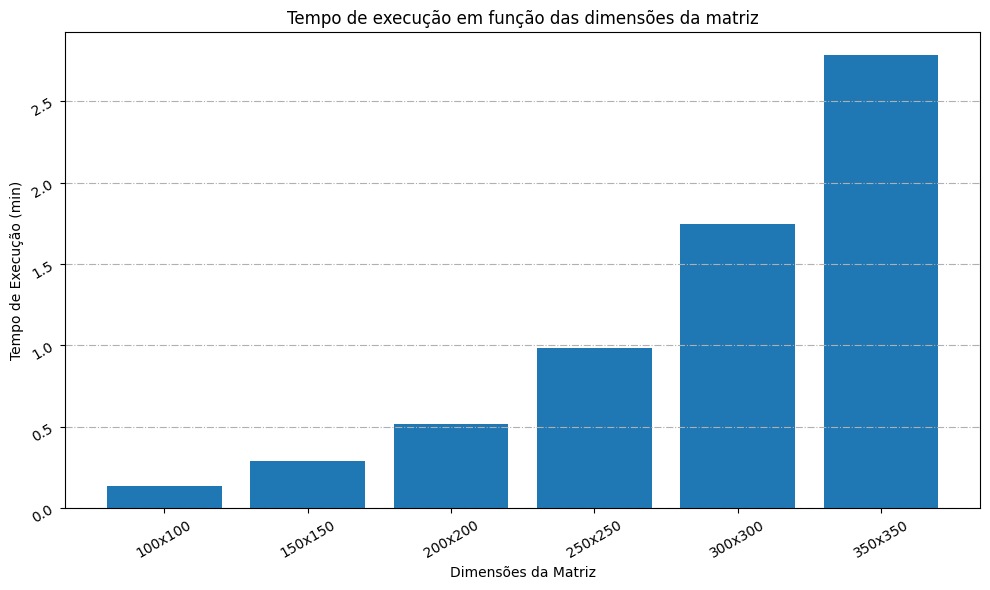

In [14]:
# Extrair as dimensões das matrizes e os tempos de execução
matrix = [f'{result.matrix.shape[0]}x{result.matrix.shape[1]}' for result in sequential_results]
execution_times = [(result.process_time / 60) for result in sequential_results]

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(matrix, execution_times)

plt.title('Tempo de execução em função das dimensões da matriz')
plt.xlabel('Dimensões da Matriz')
plt.ylabel('Tempo de Execução (min)')

plt.yticks(rotation=30)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='-.')
plt.tight_layout()

# Exibir o gráfico de barras
plt.show()

### **7. Testes e tratamento de dados**

A matriz que obtivemos no teste anterior será agora utilizada para implementar uma série de testes. Vamos usar tanto **threads** quanto **multiprocessos** para calcular o **tempo médio** de execução da multiplicação de matrizes em relação a uma variável **P**.

Inicialmente, **P** terá um valor alto que será gradualmente reduzido em potências de 2, até o mínimo de 2 threads/processos seja atingido. Para obter uma medida mais precisa, vamos calcular o tempo médio com base em 10 execuções para cada valor de **P**. Isso nos ajudará a minimizar possíveis interferências do sistema.

A seguir, apresentaremos os códigos dos testes.

In [15]:
INITIAL_P = 32

DECREMENT_P_STEP = 2
TEST_RUNS = 10

# pega o ultimo elemento
MATRIX_COMP = sequential_results[-1]

#### **7.1. Implemetação com threads**

In [16]:
# Seta o valor de P inicial
current_P = INITIAL_P

# Lista de resultados da execução com threads
threading_results = []

while current_P >= 2:
    thread_data = OperationResult
    total_execution = 0

    # Realiza n operações para obter uma média dos resultados
    for i in range(TEST_RUNS):
        thread_data = threading_multiplication(matrix1, matrix2, current_P)

        total_execution += thread_data.process_time

    media_time = total_execution / TEST_RUNS
    threading_results.append(OperationResult(P=current_P, process_time=media_time))

    current_P = current_P // DECREMENT_P_STEP

#### **7.2. Implemetação com processos**

In [17]:
# Seta o valor de P inicial
current_P = INITIAL_P

# Lista de resultados da execução com threads
multiprocessing_results = []

while current_P >= 2:
    process_data = OperationResult
    total_execution = 0

    # Realiza 10 operações para obter uma média dos resultados
    for i in range(TEST_RUNS):
        process_data = multiprocessing_multiplication(matrix1, matrix2, current_P)

        total_execution += process_data.process_time

    media_time = total_execution / TEST_RUNS
    multiprocessing_results.append(OperationResult(P=current_P, process_time=media_time))

    current_P = current_P // DECREMENT_P_STEP

### **8. Resultados e discussões**

Naturalmente, a multiplicação de matrizes apresenta desafios para a computação quando lidamos com matrizes de grandes dimensões, como evidenciado no gráfico. Este problema é mais facilmente observado no gráfico "Tempo de execução em função das dimensões da matriz", que demonstra o tempo de execução da aplicação sequencial de multiplicação de matrizes em função do tamanho de uma matriz quadrada. Apesar de ser conhecida como uma linguagem rápida, para o paralelismo, o Python se mostrou relativamente lento, especialmente com a execução em multithread, que só se passou a ser eficiente quando utilizada em conjunto com a biblioteca Numba. Isso ocorre devido à existência do **Global Interpreter Lock (GIL)**, que bloqueia temporariamente a execução do programa até que todos os processos tenham finalizado, formando uma fila de execução. Embora essa prática garanta a segurança dos dados, também limita significativamente o desempenho da aplicação.

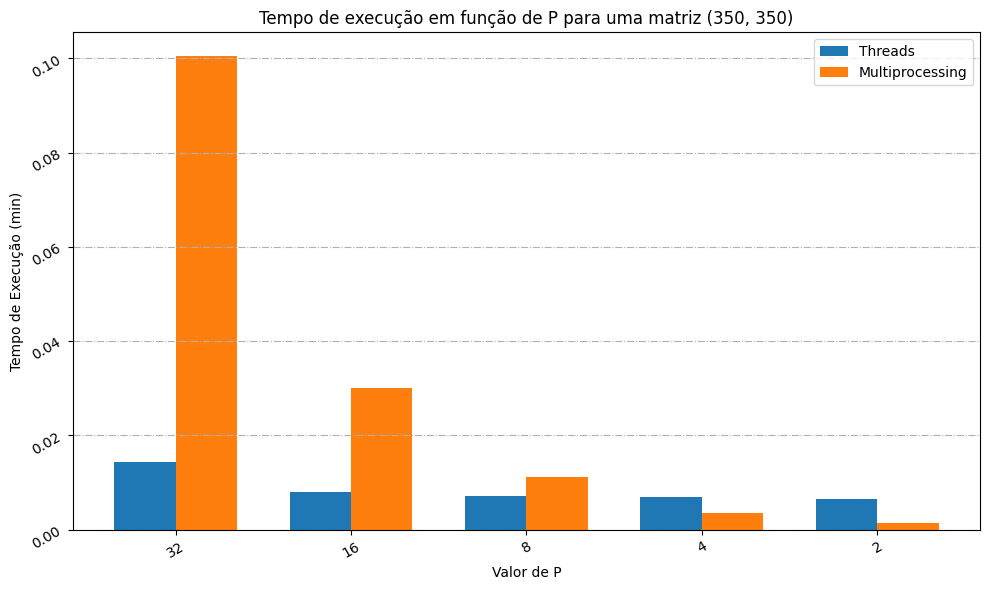

In [18]:
# Valores de P
P_values = [result.P for result in threading_results]

# Tempos de execução com threads e multiprocessing
threading_times = [(result.process_time / 60) for result in threading_results]
multiprocessing_times = [(result.process_time / 60) for result in multiprocessing_results]

# Configuração dos grupos de barras
bar_width = 0.35
index = np.arange(len(P_values))

# Criação do gráfico
plt.figure(figsize=(10, 6))
plt.bar(index - bar_width/2, threading_times, bar_width, label='Threads')
plt.bar(index + bar_width/2, multiprocessing_times, bar_width, label='Multiprocessing')

plt.title(f'Tempo de execução em função de P para uma matriz {MATRIX_COMP.matrix.shape}')
plt.xlabel('Valor de P')
plt.ylabel('Tempo de Execução (min)')

plt.yticks(rotation=30)
plt.xticks(index, P_values, rotation=30)
plt.legend()
plt.grid(axis='y', linestyle='-.')
plt.tight_layout()

# Exibir o gráfico de barras
plt.show()

#### **8.1. Análise de desempenho**

Tomando como exemplo a função em multithreading, que utiliza a biblioteca Numba, observamos um ganho significativo de desempenho à medida que o valor de P diminui. Isso se deve a uma particularidade desta versão do código que cria submatrizes a partir do valor de P e utiliza a função otimizada do Numba, prange, para realizar a multiplicação da submatriz de forma paralelizada, utilizando por padrão todos os núcleos disponíveis no sistema. Essa abordagem foi necessária novamente devido ao GIL, que impede o verdadeiro paralelismo ao utilizar a biblioteca threading, que seria normalmente empregada em uma situação como essa. Assim, à medida que o valor de P diminui, temos uma diminuição no número de submatrizes, resultando em menos chamadas à função "thread_submatrix" e consequentemente no tempo de execução.

Por outro lado, na implementação com multiprocessos observamos um aumento significativo no tempo de execução de cada processo, mesmo com um número elevado de processos com alta paralelização. Novamente, isso se deve ao GIL, que apesar de ser único para cada processo, bloqueia o compartilhamento de dados entre os processos, resultando na necessidade de uma fila de retornos para cada processo, que respeita uma ordem de solicitação para manter a segurança da memória. A situação tende a melhorar à medida que o valor de P cai, devido ao menor número de processos criados, resultando em uma fila menor para acesso à memória. No entanto, o tempo de execução para cada teste com multiprocessamento ainda é significativamente maior quando comparado à aplicação em multiprocessos, devido ao grande número de operações necessárias para acessar a memória e compartilhar as informações.

No entanto, apesar das dificuldades e limitações da linguagem Python, cada abordagem provou ser vantajosa em diversos cenários. A implementação multithreaded se mostrou bastante eficaz no processamento de informações com alta independência de dados e pode ser ainda mais potencializada quando trabalhada com GPUs. Além disso, a segurança proporcionada pelo GIL quando em estado unitário para cada processo se mostrou vantajosa em casos onde os dados processados necessitam ser seguros para o tratamento. Isso é mais eficaz quando usado em conjunto com poucos processos.

### **9. Referencia**

* [Multithread com Python - Leonardo Gomes Nunes](https://repositorio.unifesp.br/bitstream/handle/11600/66871/TCC_Leonardo___Multithread_com_Python%20%281%29.pdf?sequence=5&isAllowed=y)
* [Multiprocessing Documentação](https://docs.python.org/pt-br/3/library/multiprocessing.html)
* [Pandas Documentação](https://pandas.pydata.org/docs/index.html)
* [Numba Documentação](https://numba.pydata.org/numba-doc/latest/index.html)
* [Indo além com Jupyter Notebook - Ítalo Epifânio](https://raw.githubusercontent.com/itepifanio/indo-alem-com-jupyter-notebooks/main/presentation/index.pdf)
* [Matplotlib Documentação](https://matplotlib.org/stable/)